In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("globalterrorismdb_0718dist.csv", encoding='ISO-8859-1')

/home/andrea/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [13]:
events_per_year = data[['eventid','iyear']].groupby("iyear").count().reset_index()

In [14]:
events_per_year.rename(columns={'iyear':'Year', 'eventid':'cnt'}, inplace=True)

In [15]:
events_per_year.head()

,Year,cnt
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

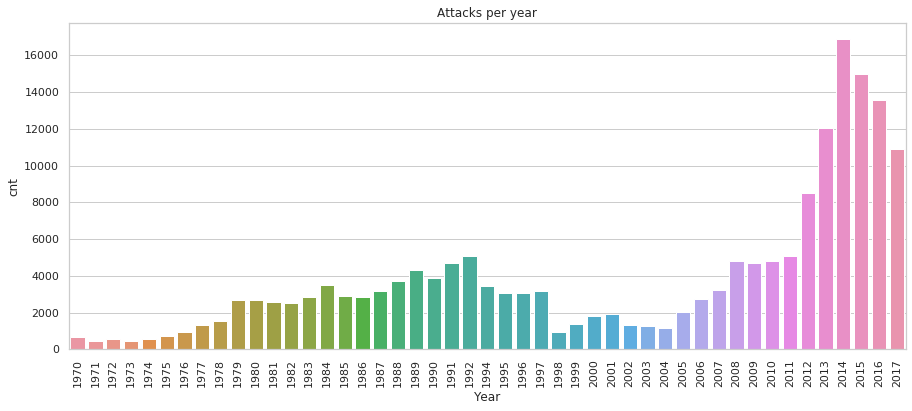

In [16]:
plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.barplot(x="Year", y="cnt", data=events_per_year)
ax.set_title('Attacks per year')
plt.xticks(rotation=90)

In [17]:
events_per_year.Year.unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

# 1993 values are missing

In [18]:
success_per_year = data[['iyear','success']].groupby("iyear").sum().reset_index()

In [34]:
success_per_year.head()

,Year,success,failure
0,1970,549,102
1,1971,420,51
2,1972,452,116
3,1973,433,40
4,1974,545,36


In [20]:
success_per_year.rename(columns={'iyear':'Year'}, inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text xticklabel objects>)

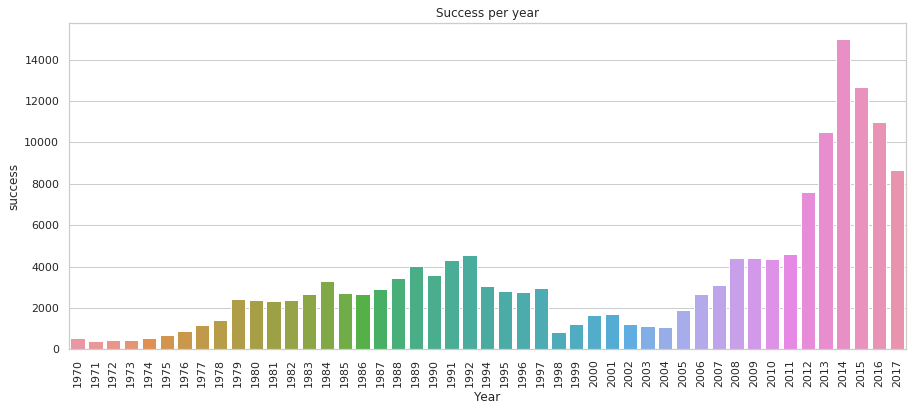

In [21]:
plt.subplots(figsize=(15,6))
sns.set(style="whitegrid")
ax = sns.barplot(x="Year", y="success", data=success_per_year)
ax.set_title('Success per year')
plt.xticks(rotation=90)

In [23]:
success_per_year['failure'] = events_per_year['cnt'] - success_per_year['success']


In [37]:
success_per_year.tail()

,Year,success,failure
42,2013,10484,1552
43,2014,15015,1888
44,2015,12676,2289
45,2016,10975,2612
46,2017,8652,2248


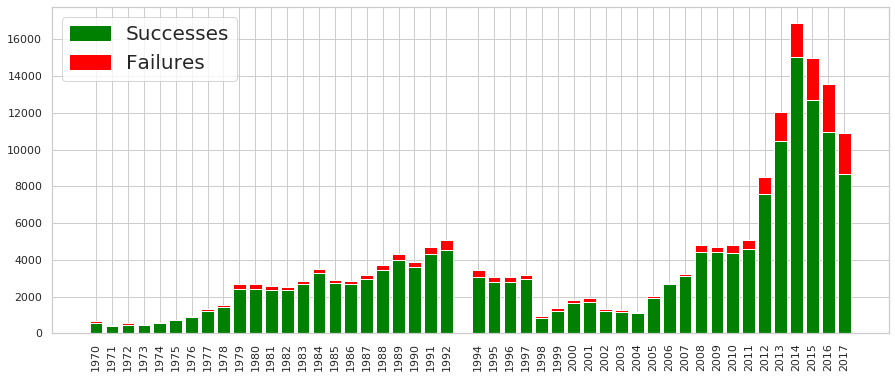

In [47]:
import matplotlib.patches as mpatches

plt.subplots(figsize=(15,6))
bars1 = success_per_year['success']
bars2 = success_per_year['failure']
bars = np.add(bars1, bars2).tolist()
names = success_per_year['Year']
r = [x for x in success_per_year.Year]

plt.bar(r, bars1, color='green', edgecolor='white')
plt.bar(r, bars2, bottom=bars1, color='red', edgecolor='white')

plt.xticks(r)
plt.xticks(rotation=90)

red_patch = mpatches.Patch(color='red', label='Failures')
green_patch = mpatches.Patch(color='green', label='Successes')

plt.legend(handles=[green_patch,red_patch], fontsize = 20)

